# Scaling, Normalization and Standardization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

data = pd.read_csv('datos_personas.txt')
data


,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


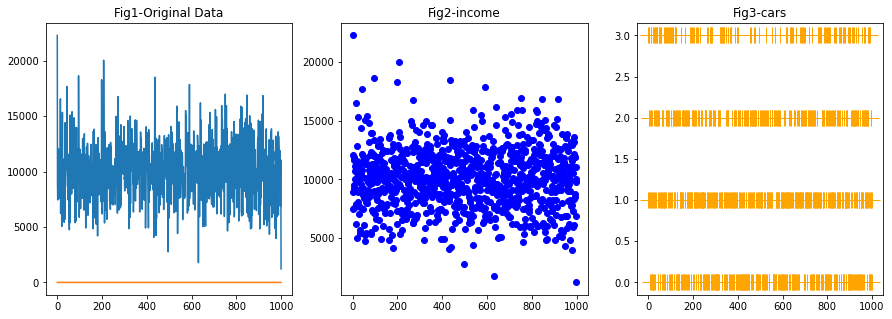

In [5]:
# Data visualization
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.set_title('Fig1-Original Data')
ax1.plot(data)

ax2.set_title('Fig2-income')
ax2.plot(data['ingreso'], linewidth=0, marker='o', color='blue', markersize=6)

ax3.set_title('Fig3-cars')
ax3.plot(data['carros'], linewidth=0, marker='+', color='orange', markersize=16)

plt.show()



### Distribution of original data

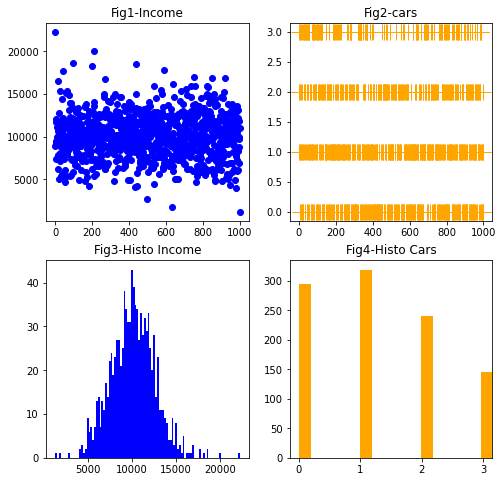

In [9]:
# Data visualization
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.set_title('Fig1-Income')
ax1.plot(data['ingreso'], linewidth=0, marker='o', color='blue', markersize=6)

ax2.set_title('Fig2-cars')
ax2.plot(data['carros'], linewidth=0, marker='+', color='orange', markersize=16)

ax3.set_title('Fig3-Histo Income')
ax3.hist(data['ingreso'], bins=100, color='blue')

ax4.set_title('Fig4-Histo Cars')
ax4.hist(data['carros'], bins=100, color='orange', width=0.2)

plt.show()


### Conclusion: The income values are more grather than number of cars, so We need to convert o to scale both variables.
### There are 4 ways to do this in Python:
    1- Scaling Method: MinMaxScaler
    2- Normalization Method: Normalizer
    3- Estandardization Method: StandardScaler
    4- Robust Method: RobustScaler

### 1- Scaling with Min_Max function
#### This is the typical scaling to 0..1 values.

In [10]:
data_min_max = preprocessing.MinMaxScaler().fit_transform(data)
data_min_max

array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

### 2- Normalization Method: Normalizer
#### This uses the norma from vector:


In [13]:
data_normalizer = preprocessing.Normalizer().fit_transform(data.T)
data_normalizer = data_normalizer.T
# normalization = X / square_root(X_1^2 + X_2^2 + X_3^2, + ...)
data_normalizer

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

### 3- Estandardization Method: StandardScaler
#### This uses z = (x- mean)/std

In [14]:
data_standard_scaler = preprocessing.StandardScaler().fit_transform(data)
data_standard_scaler

array([[ 4.81555174,  1.70892042],
       [-0.4413019 , -0.23193185],
       [-1.04273197,  0.73849429],
       ...,
       [-0.12678303, -0.23193185],
       [ 0.38122719, -0.23193185],
       [-3.49719763, -1.20235798]])

### 4- Robust Method: RobustScaler
#### This uses r = (X - interquartil_range)/std

In [15]:
data_robust_scaler = preprocessing.RobustScaler().fit_transform(data)
data_robust_scaler

array([[ 3.70548334,  1.        ],
       [-0.3376601 ,  0.        ],
       [-0.80023109,  0.5       ],
       ...,
       [-0.09575781,  0.        ],
       [ 0.29496225,  0.        ],
       [-2.68800607, -0.5       ]])

#### NOTE: The Robust method is the most used, since is not affected by outlier.

### We will comparate the four methods by the 'income' column

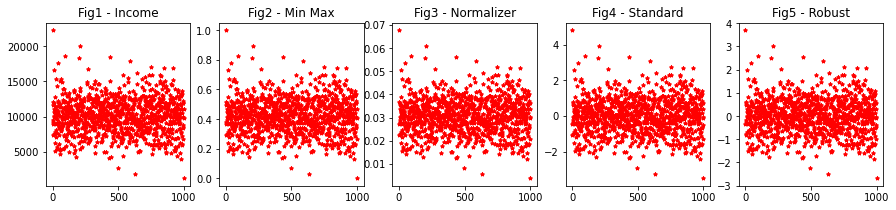

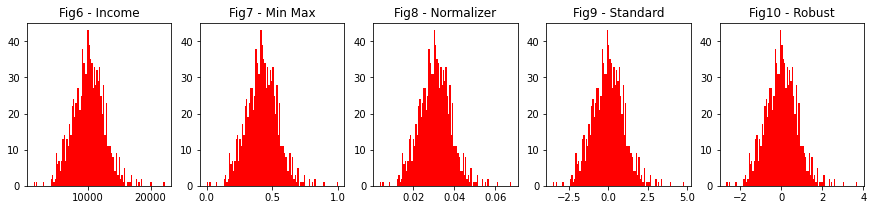

In [21]:
# We need to convert the vectors from numpy (the transform methods return arrays belong to numpy library) to DataFrames.
data_min_max         = pd.DataFrame(data_min_max, columns=['ingreso','carros'])
data_normalizer      = pd.DataFrame(data_normalizer, columns=['ingreso','carros'])
data_standard_scaler = pd.DataFrame(data_standard_scaler, columns=['ingreso','carros'])
data_robust_scaler   = pd.DataFrame(data_robust_scaler, columns=['ingreso','carros'])

# To create a 5-tier diagram to compare the different methods
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

# To create and customize the Data Series
ax1.set_title('Fig1 - Income')
ax1.plot(data['ingreso'], linewidth=0, marker='*', color='red', markersize=4)

ax2.set_title('Fig2 - Min Max')
ax2.plot(data_min_max['ingreso'], linewidth=0, marker='*', color='red', markersize=4)

ax3.set_title('Fig3 - Normalizer')
ax3.plot(data_normalizer['ingreso'], linewidth=0, marker='*', color='red', markersize=4)
#ax3.set_ylim(0, 1)

ax4.set_title('Fig4 - Standard')
ax4.plot(data_standard_scaler['ingreso'], linewidth=0, marker='*', color='red', markersize=4)

ax5.set_title('Fig5 - Robust')
ax5.plot(data_robust_scaler['ingreso'], linewidth=0, marker='*', color='red', markersize=4)

plt.show()

# To create histograms
# To create a 5-tier diagram to compare the different methods
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

# To create and customize the Data Series
ax1.set_title('Fig6 - Income')
ax1.hist(data['ingreso'], color='red', bins=100)

ax2.set_title('Fig7 - Min Max')
ax2.hist(data_min_max['ingreso'], color='red', bins=100)

ax3.set_title('Fig8 - Normalizer')
ax3.hist(data_normalizer['ingreso'], color='red', bins=100)

ax4.set_title('Fig9 - Standard')
ax4.hist(data_standard_scaler['ingreso'], color='red', bins=100)

ax5.set_title('Fig10 - Robust')
ax5.hist(data_robust_scaler['ingreso'], color='red', bins=100)

plt.show()


#### In the fig 3 the rank is too short, in the fig4, the standard is ok, but there is a outlier 4.x. Fig5 all data is inside the rank, it means there are not outliers, then it is the most used method.

#### Also, if we see the histograms, the best accuracy is given by the Standard and Robust methods, because the distributions are centered at 0. Otherwise, the Min Max does not have a good distribution, it is not centered and the data was got by a normal distribution and naturally has a good distribution, in real cases it will be completely  different.

#### My advice is to use the robust method. 

### We will compare the four methods by the 'cars' column

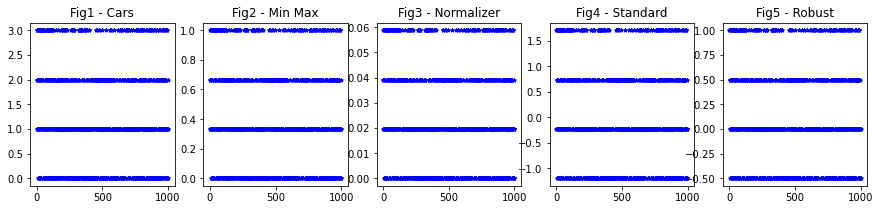

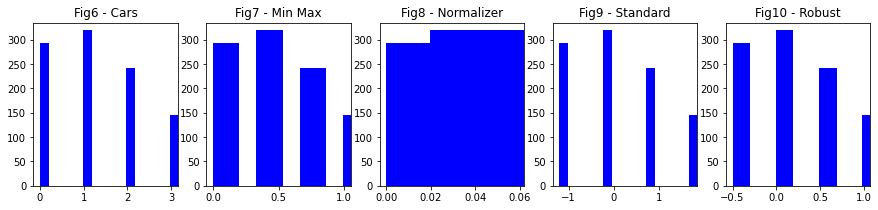

In [24]:
# To create a 5-tier diagram to compare the different methods
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

# To create and customize the Data Series
ax1.set_title('Fig1 - Cars')
ax1.plot(data['carros'], linewidth=0, marker='*', color='blue', markersize=4)

ax2.set_title('Fig2 - Min Max')
ax2.plot(data_min_max['carros'], linewidth=0, marker='*', color='blue', markersize=4)

ax3.set_title('Fig3 - Normalizer')
ax3.plot(data_normalizer['carros'], linewidth=0, marker='*', color='blue', markersize=4)
#ax3.set_ylim(0, 1)

ax4.set_title('Fig4 - Standard')
ax4.plot(data_standard_scaler['carros'], linewidth=0, marker='*', color='blue', markersize=4)

ax5.set_title('Fig5 - Robust')
ax5.plot(data_robust_scaler['carros'], linewidth=0, marker='*', color='blue', markersize=4)

plt.show()

# To create histograms
# To create a 5-tier diagram to compare the different methods
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

# To create and customize the Data Series
ax1.set_title('Fig6 - Cars')
ax1.hist(data['carros'], color='blue', bins=100, width=0.2)

ax2.set_title('Fig7 - Min Max')
ax2.hist(data_min_max['carros'], color='blue', bins=100, width=0.2)

ax3.set_title('Fig8 - Normalizer')
ax3.hist(data_normalizer['carros'], color='blue', bins=100, width=0.2)

ax4.set_title('Fig9 - Standard')
ax4.hist(data_standard_scaler['carros'], color='blue', bins=100, width=0.2)

ax5.set_title('Fig10 - Robust')
ax5.hist(data_robust_scaler['carros'], color='blue', bins=100, width=0.2)

plt.show()


#### The result is similar to  first columns, normalizer compress the data.

### The best method to choose is the experimentation, but we can combine, for example, firs, to apply the robust method to eliminate the outliers, and then to apply the Min Max to transform to [0..1] range.
